<a href="https://colab.research.google.com/github/harman-ransi-1016/ChatGPT_v_VADER_Sentiment/blob/main/VADER_vs_GPT_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Harman Ransi <br>
4/14/24 <br>
Data Mining 2 <br>
Final Project

# Installs

In [ ]:
!pip install mxnet
!pip install gluonts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.6 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.3
    Uninstalling graphviz-0.20.3:
      Successfully uninstalled graphviz-0.20.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 14.5 MB/s eta 0:00:00


In [ ]:
!pip uninstall numpy
!pip install numpy==1.23.1

Found existing installation: numpy 1.25.2
Uninstalling numpy-1.25.2:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.10
    /usr/local/lib/python3.10/dist-packages/numpy-1.25.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-5007b62f.3.23.dev.so
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/numpy/*
Proceed (Y/n)? Y
  Successfully uninstalled numpy-1.25.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 41.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.86 requires numpy>=1.24.1, but you have numpy 1.23.1 which is incompatible.
pandas-stubs 2.0.3.230814 requires numpy>=1.25.0; pyth

# Data Import

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

vader_results = []
gpt_results = []

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM2 Final Project/final_data_lagged.csv')
df = df[['Date', 'News', 'News_Sentiment', 'Open', 'High', 'Low', 'Close', 'normalized_close', 'Adj Close', 'Volume', 'GPTavg_Sentiment', 'VADERavg_Sentiment']]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the "Open", "High", "Low", "Close", and "Volume" columns
df[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Volume']])

# Drop the "Adj Close" column
df.drop(columns=['Adj Close'], inplace=True)

df.head()

,Date,News,News_Sentiment,Open,High,Low,Close,normalized_close,Volume,GPTavg_Sentiment,VADERavg_Sentiment
0,2021-10-05,"- TSLA reported strong Q3 delivery numbers, ex...",positive,0.158065,0.077817,0.175419,0.104780,0.104780,0.131943,0.272727,0.107517
1,2021-10-06,"- TSLA reported record Q3 deliveries, surpassi...",positive,0.141961,0.055805,0.173594,0.109083,0.109083,0.057687,0.317647,0.134044
2,2021-10-07,- TSLA Q3 delivery numbers exceed expectations...,positive,0.159301,0.093711,0.192514,0.130721,0.130721,0.146858,0.150000,0.246778
3,2021-10-08,- TSLA stock sees gains amidst overall positiv...,positive,0.179431,0.075894,0.187914,0.114542,0.114542,0.098839,0.387324,0.182214
4,2021-10-11,- TSLA stock rises amid global electric vehicl...,positive,0.163402,0.085939,0.196462,0.127393,0.127393,0.049235,0.267442,0.214657


In [ ]:
# Import necessary libraries
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

# Split the dataset into training and testing sets
train = df[(df['Date'] >= '2021-10-05') & (df['Date'] <= '2022-04-01')].drop(['News', 'News_Sentiment', 'normalized_close'], axis=1)
test = df[(df['Date'] >= '2022-04-02') & (df['Date'] <= '2022-04-12')].drop(['News', 'News_Sentiment', 'normalized_close'], axis=1)


# Separate features and target variable for both training and testing
X_train = train.drop(['Close', 'Date'], axis=1)
y_train = train['Close']
X_test = test.drop(['Close', 'Date'], axis=1)
y_test = test['Close']

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Granger Causality Test

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests
import warnings

df.head()

,Date,News,News_Sentiment,Open,High,Low,Close,normalized_close,Volume,GPTavg_Sentiment,VADERavg_Sentiment
0,2021-10-05,"- TSLA reported strong Q3 delivery numbers, ex...",positive,0.158065,0.077817,0.175419,0.104780,0.104780,0.131943,0.272727,0.107517
1,2021-10-06,"- TSLA reported record Q3 deliveries, surpassi...",positive,0.141961,0.055805,0.173594,0.109083,0.109083,0.057687,0.317647,0.134044
2,2021-10-07,- TSLA Q3 delivery numbers exceed expectations...,positive,0.159301,0.093711,0.192514,0.130721,0.130721,0.146858,0.150000,0.246778
3,2021-10-08,- TSLA stock sees gains amidst overall positiv...,positive,0.179431,0.075894,0.187914,0.114542,0.114542,0.098839,0.387324,0.182214
4,2021-10-11,- TSLA stock rises amid global electric vehicl...,positive,0.163402,0.085939,0.196462,0.127393,0.127393,0.049235,0.267442,0.214657


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests
import warnings

# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define the list of sentiments to analyze
sentiments = ['GPTavg_Sentiment', 'VADERavg_Sentiment']

lags = range(1, 7)  # Adjust the range as needed

# Create an empty DataFrame to store the p-values
p_values_df = pd.DataFrame(index=lags, columns=['Lag'] + sentiments)

for sentiment in sentiments:
    for lag in lags:
        # Perform Granger causality test
        result = grangercausalitytests(df[[sentiment, 'Close']], maxlag=lag, verbose=False)

        # Extract the p-value from the test result and round to the nearest thousandth
        p_value = round(result[lag][0]['ssr_ftest'][1], 3)

        # Store the rounded p-value in the DataFrame
        p_values_df.at[lag, sentiment] = p_value

# Add the 'Lag' column to the DataFrame
p_values_df['Lag'] = p_values_df.index

# Set 'Lag' as the first column
p_values_df = p_values_df[['Lag'] + sentiments]

# Print the resulting DataFrame with rounded p-values
print(p_values_df)


   Lag GPTavg_Sentiment VADERavg_Sentiment
1    1            0.007              0.038
2    2              0.0                0.0
3    3              0.0                0.0
4    4              0.0                0.0
5    5              0.0                0.0
6    6              0.0                0.0


# VADER

In [ ]:
from gluonts.mx.model.deepstate import DeepStateEstimator
from gluonts.mx.trainer import Trainer
from gluonts.dataset.common import ListDataset
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.evaluation import Evaluator


# Specify the start date for training and testing data
start_date_train = train['Date'].iloc[0]
start_date_test = test['Date'].iloc[0]

# Prepare the datasets
training_data = ListDataset(
    [{"start": start_date_train, "target": train['Close'], "feat_dynamic_real": train[['Close','Open', 'High', 'Low', 'VADERavg_Sentiment']].values.tolist()}],
    freq="1D"
)
testing_data = ListDataset(
    [{"start": start_date_test, "target": test['Close'], "feat_dynamic_real": test[['Close','Open', 'High', 'Low', 'VADERavg_Sentiment']].values.tolist()}],
    freq="1D"
)

In [ ]:
# Define a list of configurations for the number of layers and nodes
configurations = [
    # large nodes per layer means smaller batches
    # small nodes per layer means we might want larger batches
    {"batch_size": 60, "layers": 2, "nodes": 32, "learning_rate": 0.01},
    {"batch_size": 100, "layers": 3, "nodes": 16, "learning_rate": 0.01},
    {"batch_size": 125, "layers": 4, "nodes": 8, "learning_rate": 0.01},
    {"batch_size": 80, "layers": 2, "nodes": 24, "learning_rate": 0.001},
    {"batch_size": 100, "layers": 3, "nodes": 16, "learning_rate": 0.001},
    {"batch_size": 125, "layers": 4, "nodes": 8, "learning_rate": 0.001}
]

for config in configurations:
    # Create a new estimator with the current configuration
    ## Process
    # 1) each datapoint goes thru RNN, RNN nodes get tweaked, move to next point
    # 2) batch size... how big of batches will RNN get (10 points vs 100 points)
    #     big size... + can see more data, - may overfit & more RNN tweaks
    #     small size... + easier to process, - may not see whole picture
    # 3) epochs... how many iterations do we want to go thru

    estimator = DeepStateEstimator(
        prediction_length=1,
        freq='1D',
        use_feat_static_cat=False,
        cardinality=[1],
        trainer=Trainer(ctx="cpu",
                        epochs=7,
                        learning_rate=config["learning_rate"],
                        num_batches_per_epoch=config["batch_size"]
                       ),
        num_layers=config["layers"],
        num_cells=config["nodes"]
    )

    # Train the model and make predictions
    predictor = estimator.train(training_data=training_data)
    forecast_it, ts_it = make_evaluation_predictions(testing_data,
                                                     predictor=predictor,
                                                     num_samples=100)
    forecasts = list(forecast_it)
    tss = list(ts_it)

    # getting predictions
    evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
    agg_metrics, item_metrics = evaluator(iter(tss), iter(forecasts),
                                          num_series=len(testing_data))
    mape = agg_metrics['MAPE']

    # Calculate the range of the 80% confidence interval
    conf_interval_range = np.mean([forecast.quantile(0.9) -
                                   forecast.quantile(0.1)
                                   for forecast in
                                   forecasts])

    print(f"Config: {config}")
    print(f"MAPE: {mape}")
    print(f"conf_interval_range: {conf_interval_range}")

    # Store the results
    vader_results.append({"configuration": config, "mape": mape, "conf_interval_range": conf_interval_range, "forecasts": forecasts, "tss": tss})

    # separator
    print("------")


Running evaluation: 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]


Config: {'batch_size': 60, 'layers': 2, 'nodes': 32, 'learning_rate': 0.01}
MAPE: 0.7776960134506226
conf_interval_range: 0.08114439249038696
------


Running evaluation: 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]


Config: {'batch_size': 100, 'layers': 3, 'nodes': 16, 'learning_rate': 0.01}
MAPE: 0.4120795726776123
conf_interval_range: 0.025076687335968018
------


Running evaluation: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]


Config: {'batch_size': 125, 'layers': 4, 'nodes': 8, 'learning_rate': 0.01}
MAPE: 0.0861925259232521
conf_interval_range: 0.06696450710296631
------


Running evaluation: 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]


Config: {'batch_size': 80, 'layers': 2, 'nodes': 24, 'learning_rate': 0.001}
MAPE: 0.11891234666109085
conf_interval_range: 0.6704720258712769
------


Running evaluation: 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]


Config: {'batch_size': 100, 'layers': 3, 'nodes': 16, 'learning_rate': 0.001}
MAPE: 0.23817254602909088
conf_interval_range: 0.4444536864757538
------


Running evaluation: 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]


Config: {'batch_size': 125, 'layers': 4, 'nodes': 8, 'learning_rate': 0.001}
MAPE: 0.2065926492214203
conf_interval_range: 0.30897411704063416
------


In [ ]:
import pickle
with open('/content/drive/My Drive/vader_results.pkl', 'wb') as f:
    pickle.dump(vader_results, f)



# GPT

In [ ]:
from gluonts.mx.model.deepstate import DeepStateEstimator
from gluonts.mx.trainer import Trainer
from gluonts.dataset.common import ListDataset
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.evaluation import Evaluator


# Specify the start date for training and testing data
start_date_train = train['Date'].iloc[0]
start_date_test = test['Date'].iloc[0]

# Prepare the datasets
training_data = ListDataset(
    [{"start": start_date_train, "target": train['Close'], "feat_dynamic_real": train[['Close','Open', 'High', 'Low', 'GPTavg_Sentiment']].values.tolist()}],
    freq="1D"
)
testing_data = ListDataset(
    [{"start": start_date_test, "target": test['Close'], "feat_dynamic_real": test[['Close','Open', 'High', 'Low', 'GPTavg_Sentiment']].values.tolist()}],
    freq="1D"
)

In [ ]:
# Define a list of configurations for the number of layers and nodes
configurations = [
    # large nodes per layer means smaller batches
    # small nodes per layer means we might want larger batches
    {"batch_size": 60, "layers": 2, "nodes": 32, "learning_rate": 0.01},
    {"batch_size": 100, "layers": 3, "nodes": 16, "learning_rate": 0.01},
    {"batch_size": 125, "layers": 4, "nodes": 8, "learning_rate": 0.01},
    {"batch_size": 80, "layers": 2, "nodes": 24, "learning_rate": 0.001},
    {"batch_size": 100, "layers": 3, "nodes": 16, "learning_rate": 0.001},
    {"batch_size": 125, "layers": 4, "nodes": 8, "learning_rate": 0.001}
]

for config in configurations:
    # Create a new estimator with the current configuration
    ## Process
    # 1) each datapoint goes thru RNN, RNN nodes get tweaked, move to next point
    # 2) batch size... how big of batches will RNN get (10 points vs 100 points)
    #     big size... + can see more data, - may overfit & more RNN tweaks
    #     small size... + easier to process, - may not see whole picture
    # 3) epochs... how many iterations do we want to go thru

    estimator = DeepStateEstimator(
        prediction_length=1,
        freq='1D',
        use_feat_static_cat=False,
        cardinality=[1],
        trainer=Trainer(ctx="cpu",
                        epochs=7,
                        learning_rate=config["learning_rate"],
                        num_batches_per_epoch=config["batch_size"]
                       ),
        num_layers=config["layers"],
        num_cells=config["nodes"]
    )

    # Train the model and make predictions
    predictor = estimator.train(training_data=training_data)
    forecast_it, ts_it = make_evaluation_predictions(testing_data,
                                                     predictor=predictor,
                                                     num_samples=100)
    forecasts = list(forecast_it)
    tss = list(ts_it)

    # getting predictions
    evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
    agg_metrics, item_metrics = evaluator(iter(tss), iter(forecasts),
                                          num_series=len(testing_data))
    mape = agg_metrics['MAPE']

    # Calculate the range of the 80% confidence interval
    conf_interval_range = np.mean([forecast.quantile(0.9) -
                                   forecast.quantile(0.1)
                                   for forecast in
                                   forecasts])

    print(f"Config: {config}")
    print(f"MAPE: {mape}")
    print(f"conf_interval_range: {conf_interval_range}")

    # Store the results
    gpt_results.append({"configuration": config, "mape": mape, "conf_interval_range": conf_interval_range, "forecasts": forecasts, "tss": tss})

    # separator
    print("------")

Running evaluation: 100%|██████████| 1/1 [00:00<00:00,  8.55it/s]


Config: {'batch_size': 60, 'layers': 2, 'nodes': 32, 'learning_rate': 0.01}
MAPE: 0.3102370500564575
conf_interval_range: 0.025469303131103516
------


Running evaluation: 100%|██████████| 1/1 [00:00<00:00,  8.99it/s]


Config: {'batch_size': 100, 'layers': 3, 'nodes': 16, 'learning_rate': 0.01}
MAPE: 0.12588727474212646
conf_interval_range: 0.024773597717285156
------


Running evaluation: 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]


Config: {'batch_size': 125, 'layers': 4, 'nodes': 8, 'learning_rate': 0.01}
MAPE: 0.048768144100904465
conf_interval_range: 0.0102425217628479
------


Running evaluation: 100%|██████████| 1/1 [00:00<00:00,  9.82it/s]


Config: {'batch_size': 80, 'layers': 2, 'nodes': 24, 'learning_rate': 0.001}
MAPE: 0.16971078515052795
conf_interval_range: 0.6601070165634155
------


Running evaluation: 100%|██████████| 1/1 [00:00<00:00,  9.86it/s]


Config: {'batch_size': 100, 'layers': 3, 'nodes': 16, 'learning_rate': 0.001}
MAPE: 0.1448354870080948
conf_interval_range: 0.37145406007766724
------


Running evaluation: 100%|██████████| 1/1 [00:00<00:00,  9.03it/s]


Config: {'batch_size': 125, 'layers': 4, 'nodes': 8, 'learning_rate': 0.001}
MAPE: 0.18712155520915985
conf_interval_range: 0.41733723878860474
------


In [ ]:

import pickle
with open('/content/drive/My Drive/gpt_results.pkl', 'wb') as f:
    pickle.dump(gpt_results, f)

# Finding / Saving Best GPT & Vader Models

\- importing data

In [ ]:
import pickle
import pandas as pd

# Load gpt_results.pkl
gpt_results_path = "/content/drive/MyDrive/gpt_results.pkl"
with open(gpt_results_path, "rb") as file:
    gpt_results = pickle.load(file)

# Load vader_results.pkl
vader_results_path = "/content/drive/MyDrive/vader_results.pkl"
with open(vader_results_path, "rb") as file:
    vader_results = pickle.load(file)

/usr/local/lib/python3.10/dist-packages/gluonts/json.py:101: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


\- analyzing GPT results

In [ ]:
# Create a list to store the data
data = []

# Iterate over the results and append data to the list
for result in gpt_results:
    config = result['configuration']
    mape = result['mape']
    conf_interval = result['conf_interval_range']
    data.append([config, mape, conf_interval])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Configuration', 'MAPE', 'Confidence Interval'])

# Print the DataFrame
df.head(6)

,Configuration,MAPE,Confidence Interval
0,"{'batch_size': 60, 'layers': 2, 'nodes': 32, '...",0.310237,0.025469
1,"{'batch_size': 100, 'layers': 3, 'nodes': 16, ...",0.125887,0.024774
2,"{'batch_size': 125, 'layers': 4, 'nodes': 8, '...",0.048768,0.010243
3,"{'batch_size': 80, 'layers': 2, 'nodes': 24, '...",0.169711,0.660107
4,"{'batch_size': 100, 'layers': 3, 'nodes': 16, ...",0.144835,0.371454
5,"{'batch_size': 125, 'layers': 4, 'nodes': 8, '...",0.187122,0.417337


\- analyzing VADER results

In [ ]:
# Create a list to store the data
data = []

# Iterate over the results and append data to the list
for result in vader_results:
    config = result['configuration']
    mape = result['mape']
    conf_interval = result['conf_interval_range']
    data.append([config, mape, conf_interval])

# Create a DataFrame
df2 = pd.DataFrame(data, columns=['Configuration', 'MAPE', 'Confidence Interval'])

# Print the DataFrame
df2.head(6)

,Configuration,MAPE,Confidence Interval
0,"{'batch_size': 60, 'layers': 2, 'nodes': 32, '...",0.082778,0.051565
1,"{'batch_size': 100, 'layers': 3, 'nodes': 16, ...",0.234913,0.053413
2,"{'batch_size': 125, 'layers': 4, 'nodes': 8, '...",0.075867,0.011783
3,"{'batch_size': 80, 'layers': 2, 'nodes': 24, '...",0.016622,0.605814
4,"{'batch_size': 100, 'layers': 3, 'nodes': 16, ...",0.431873,0.238676
5,"{'batch_size': 125, 'layers': 4, 'nodes': 8, '...",0.393016,0.136144


In [ ]:
# Flatten the dictionaries in the 'Configuration' column
df['batch_size'] = df['Configuration'].apply(lambda x: x['batch_size'])
df['layers'] = df['Configuration'].apply(lambda x: x['layers'])
df['nodes'] = df['Configuration'].apply(lambda x: x['nodes'])
df.drop(columns=['Configuration'], inplace=True)

df2['batch_size'] = df2['Configuration'].apply(lambda x: x['batch_size'])
df2['layers'] = df2['Configuration'].apply(lambda x: x['layers'])
df2['nodes'] = df2['Configuration'].apply(lambda x: x['nodes'])
df2.drop(columns=['Configuration'], inplace=True)

# Merge the dataframes based on the extracted columns
merged_df = pd.merge(df, df2, on=['batch_size', 'layers', 'nodes'], suffixes=('_GPT', '_VADER'))

# Rename the columns
merged_df.rename(columns={'MAPE_GPT': 'GPT MAPE', 'MAPE': 'VADER MAPE',
                          'Confidence Interval_GPT': 'GPT CI', 'Confidence Interval': 'VADER CI'}, inplace=True)

# Print the updated DataFrame
print(merged_df.head(7))







   GPT MAPE    GPT CI  batch_size  layers  nodes  MAPE_VADER  \
0  0.310237  0.025469          60       2     32    0.082778   
1  0.310237  0.025469          60       2     32    0.777696   
2  0.125887  0.024774         100       3     16    0.234913   
3  0.125887  0.024774         100       3     16    0.431873   
4  0.125887  0.024774         100       3     16    0.412080   
5  0.125887  0.024774         100       3     16    0.238173   
6  0.144835  0.371454         100       3     16    0.234913   

   Confidence Interval_VADER  
0                   0.051565  
1                   0.081144  
2                   0.053413  
3                   0.238676  
4                   0.025077  
5                   0.444454  
6                   0.053413  


In [ ]:
# Select the record at index 2
record_at_index_2 = merged_df.iloc[[2]].copy()

# Reset the index
record_at_index_2.reset_index(drop=True, inplace=True)

# Print the isolated DataFrame
record_at_index_2.head()


,GPT MAPE,GPT CI,batch_size,layers,nodes,MAPE_VADER,Confidence Interval_VADER
0,0.125887,0.024774,100,3,16,0.234913,0.053413


In [ ]:
# Check the columns in merged_df
print(merged_df.columns)

# If the column names are different, adjust them accordingly
# For example, if 'MAPE' in df corresponds to 'GPT MAPE' and 'VADER MAPE' in df2
# Adjust the column names before merging

# Rename the 'Configuration' column with confi{index_of_record}
for idx in range(len(merged_df)):
    merged_df.at[idx, 'Configuration'] = f"config{idx}"

# Create DataFrame for MAPE
mape_df = merged_df[['Configuration', 'GPT MAPE', 'MAPE_VADER']]  # Adjust column name if necessary

# Create DataFrame for Confidence Interval
ci_df = merged_df[['Configuration', 'GPT CI', 'Confidence Interval_VADER']]  # Adjust column name if necessary

# Print the updated DataFrames
print("MAPE DataFrame:")
print(mape_df)
print("\nConfidence Interval DataFrame:")
print(ci_df)



Index(['GPT MAPE', 'GPT CI', 'batch_size', 'layers', 'nodes', 'MAPE_VADER',
       'Confidence Interval_VADER', 'Configuration'],
      dtype='object')
MAPE DataFrame:
   Configuration  GPT MAPE  MAPE_VADER
0        config0  0.310237    0.082778
1        config1  0.310237    0.777696
2        config2  0.125887    0.234913
3        config3  0.125887    0.431873
4        config4  0.125887    0.412080
5        config5  0.125887    0.238173
6        config6  0.144835    0.234913
7        config7  0.144835    0.431873
8        config8  0.144835    0.412080
9        config9  0.144835    0.238173
10      config10  0.048768    0.075867
11      config11  0.048768    0.393016
12      config12  0.048768    0.086193
13      config13  0.048768    0.206593
14      config14  0.187122    0.075867
15      config15  0.187122    0.393016
16      config16  0.187122    0.086193
17      config17  0.187122    0.206593
18      config18  0.169711    0.016622
19      config19  0.169711    0.118912

Confidence I

In [ ]:
mape_df.head(7)

,Configuration,GPT MAPE,VADER MAPE
0,confi0,0.310237,0.082778
1,confi1,0.125887,0.234913
2,confi2,0.048768,0.075867
3,confi3,0.169711,0.016622
4,confi4,0.144835,0.431873
5,confi5,0.187122,0.393016


In [ ]:
ci_df.head(7)

,Configuration,GPT CI,VADER CI
0,confi0,0.025469,0.051565
1,confi1,0.024774,0.053413
2,confi2,0.010243,0.011783
3,confi3,0.660107,0.605814
4,confi4,0.371454,0.238676
5,confi5,0.417337,0.136144


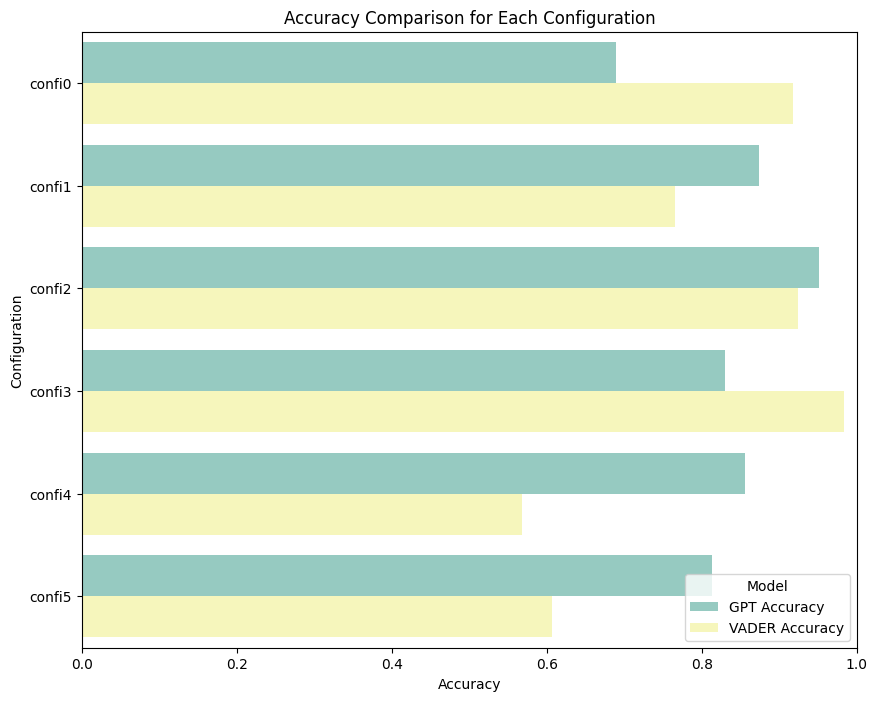

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Invert the MAPE values to get accuracy (1 - MAPE)
mape_df['GPT Accuracy'] = 1 - mape_df['GPT MAPE']
mape_df['VADER Accuracy'] = 1 - mape_df['VADER MAPE']

# Melt the DataFrame to long format for easier plotting
melted_df = mape_df.melt(id_vars=['Configuration'],
                          value_vars=['GPT Accuracy', 'VADER Accuracy'],
                          var_name='Model',
                          value_name='Accuracy')

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Accuracy', y='Configuration', hue='Model', data=melted_df, palette='Set3')

plt.title('Accuracy Comparison for Each Configuration')
plt.xlabel('Accuracy')
plt.ylabel('Configuration')
plt.xlim(0, 1)  # Set x-axis limit from 0 to 1 for accuracy percentage
plt.legend(title='Model', loc='lower right')
plt.show()





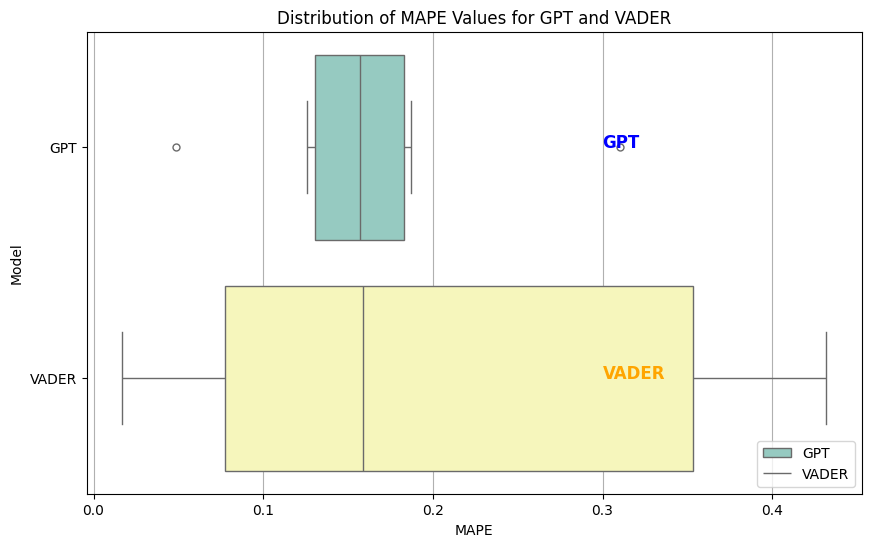

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Invert the MAPE values to get accuracy (1 - MAPE)
combined_df['GPT Accuracy'] = 1 - combined_df['GPT']
combined_df['VADER Accuracy'] = 1 - combined_df['VADER']

# Drop the original MAPE columns
combined_df.drop(columns=['GPT', 'VADER'], inplace=True)

# Create a horizontal boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df, orient='h', palette='Set3', fliersize=5)

# Add labels to the boxplot
plt.text(0.8, 0, 'GPT', fontsize=12, color='blue', weight='bold')
plt.text(0.8, 1, 'VADER', fontsize=12, color='orange', weight='bold')

# Show legend
plt.legend(labels=['GPT', 'VADER'], loc='lower right')

plt.title('Distribution of Accuracy Values for GPT an


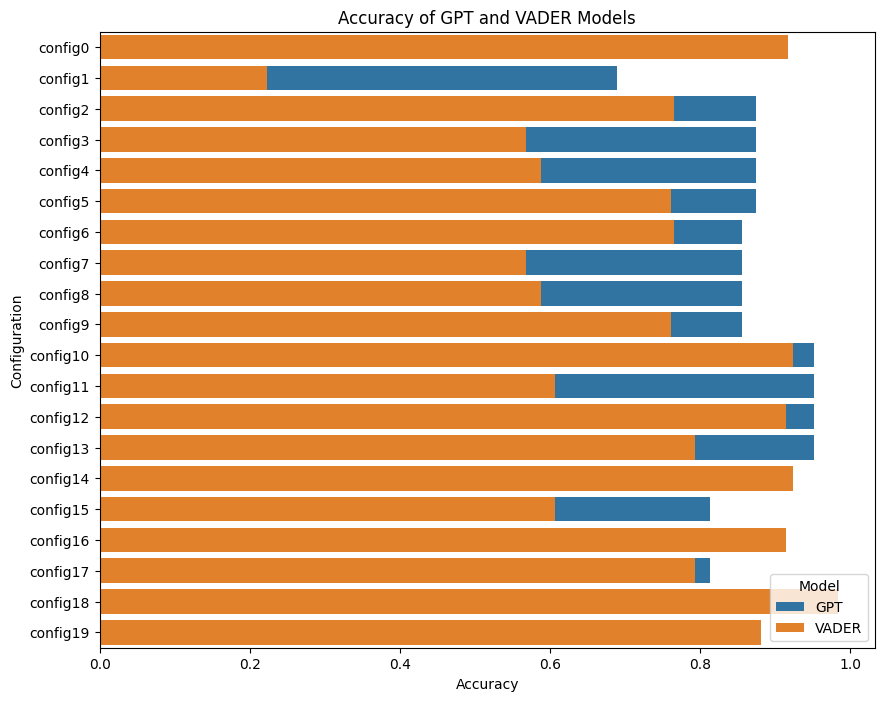

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the MAPE values from both models into a single DataFrame
accuracy_df = pd.DataFrame({
    'Model': ['GPT'] * len(mape_df) + ['VADER'] * len(mape_df),
    'Configuration': list(mape_df['Configuration']) * 2,
    'Accuracy': [1 - mape for mape in list(mape_df['GPT MAPE'])] + [1 - mape for mape in list(mape_df['MAPE_VADER'])]
})

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(data=accuracy_df, y='Configuration', x='Accuracy', hue='Model', dodge=False)

# Add labels and title
plt.title('Accuracy of GPT and VADER Models')
plt.xlabel('Accuracy')
plt.ylabel('Configuration')

# Show legend
plt.legend(title='Model', loc='lower right')

# Show the plot
plt.show()


# Plots (General Analysis)

* focus on april (April 2 to April 12)
* Sentiment in real life & GPT Sentiment reflect this (tons of layoffs @ tsla)
* Rumors of Elon Buying Twitter (maybe)

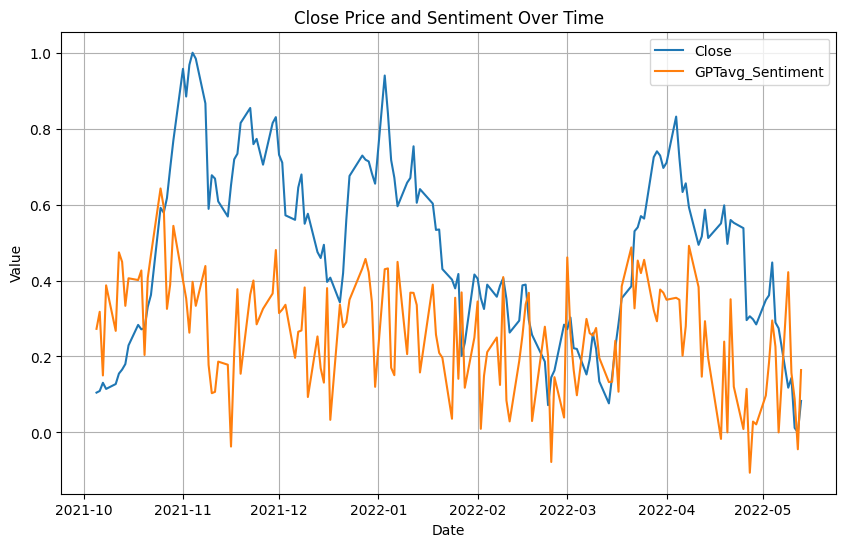

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Plot 'Close', 'GPTavg_Sentiment', and 'VADERavg_Sentiment' variables across dates
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], linestyle='-', label='Close')
plt.plot(df['Date'], df['GPTavg_Sentiment'], linestyle='-', label='GPTavg_Sentiment')
plt.title('Close Price and Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


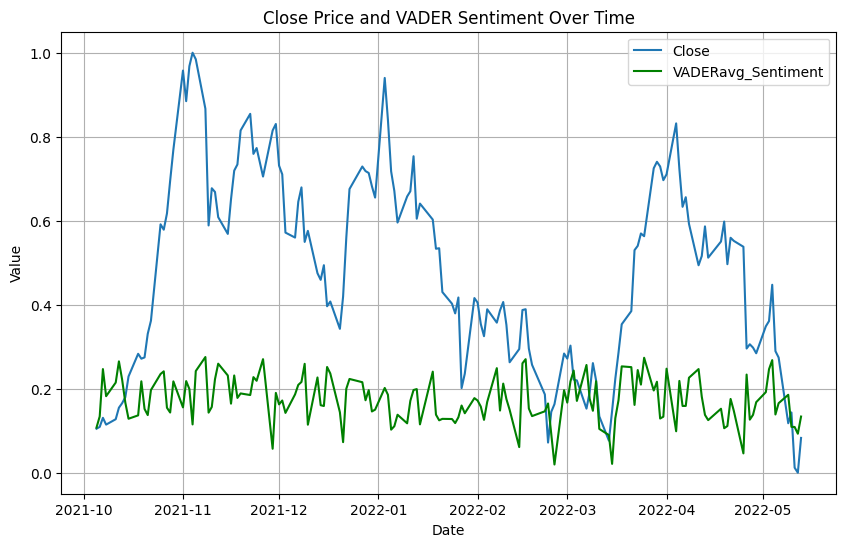

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Plot 'Close' and 'VADERavg_Sentiment' variables across dates
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], linestyle='-', label='Close')
plt.plot(df['Date'], df['VADERavg_Sentiment'], linestyle='-', label='VADERavg_Sentiment', color='green')  # Set color to green
plt.title('Close Price and VADER Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Filter the dataframe for April dates
april_data = df[(df['Date'].dt.month == 4)]

# Print the Dates and Close values for April
print(april_data[['Date', 'Close', 'GPTavg_Sentiment']])


          Date     Close  GPTavg_Sentiment
124 2022-04-01  0.710466          0.349398
125 2022-04-04  0.831723          0.354545
126 2022-04-05  0.723755          0.349398
127 2022-04-06  0.633102          0.201923
128 2022-04-07  0.656014          0.280000
129 2022-04-08  0.592716          0.491379
130 2022-04-11  0.493973          0.382979
131 2022-04-12  0.515929          0.146789
132 2022-04-13  0.586500          0.292929
133 2022-04-14  0.512044          0.195876
134 2022-04-18  0.550477         -0.017143
135 2022-04-19  0.598016          0.239130
136 2022-04-20  0.496503          0.000000
137 2022-04-21  0.559423          0.350685
138 2022-04-22  0.551991          0.120419
139 2022-04-25  0.537985          0.008929
140 2022-04-26  0.295710          0.114650
141 2022-04-27  0.305852         -0.106195
142 2022-04-28  0.297882          0.028571
143 2022-04-29  0.284433          0.021164


# Plots of Results (Unable to Finish)

\- GPT Forecasts and TSS

In [ ]:
# Define the target configuration
target_config = {'batch_size': 125, 'layers': 4, 'nodes': 8, 'learning_rate': 0.01}

# Initialize variables to store forecasts and tss
gpt_forecasts = None
gpt_tss = None

# Iterate over gpt_results to find the matching configuration
for result in gpt_results:
    config = result['configuration']
    if config == target_config:
        gpt_forecasts = result['forecasts']
        gpt_tss = result['tss']
        break

# Check if the configuration was found
if gpt_forecasts is not None and gpt_tss is not None:
    print("GPT configuration found.")
else:
    print("GPT configuration not found.")

print("------------------------")



GPT configuration found.
------------------------


\- VADER forecasts and tss

In [ ]:
# Define the target configuration
target_config_vader = {'batch_size': 125, 'layers': 4, 'nodes': 8, 'learning_rate': 0.01}

# Initialize variables to store forecasts and tss for vader_results
vader_forecasts = None
vader_tss = None

# Iterate over vader_results to find the matching configuration
for result in vader_results:
    config_vader = result['configuration']
    if config_vader == target_config_vader:
        vader_forecasts = result['forecasts']
        vader_tss = result['tss']
        break

# Check if the configuration was found
if vader_forecasts is not None and vader_tss is not None:
    print("Vader configuration found.")
else:
    print("Vader configuration not found.")

print("--------------------------")

Vader configuration found.
--------------------------
